<H1>Limpieza y Preprocesado de los datos</H1>

In [42]:
#importacón de las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,normalize
from sklearn.cluster import KMeans

In [23]:
#Conociendo las variables a trabajar
df = pd.read_csv("creditcardcsvpresent.csv")
df.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [24]:
#Visualización de los datos completos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

In [25]:
#conteo de cada tipo de variable
df.dtypes.value_counts()

int64      4
float64    4
object     4
dtype: int64

In [26]:
# Ciclo para determinar las variables de tipo categorico
for col in df.select_dtypes("object"):
    print(col)

Is declined
isForeignTransaction
isHighRiskCountry
isFradulent


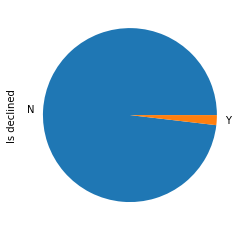

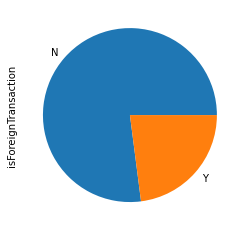

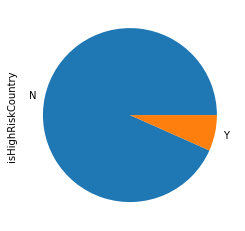

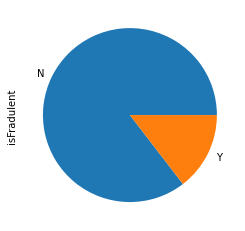

In [27]:
#Graficación de los datos de tipo categorico
for col in df.select_dtypes("object"):
    plt.figure()
    df[col].value_counts(normalize=True).plot.pie()

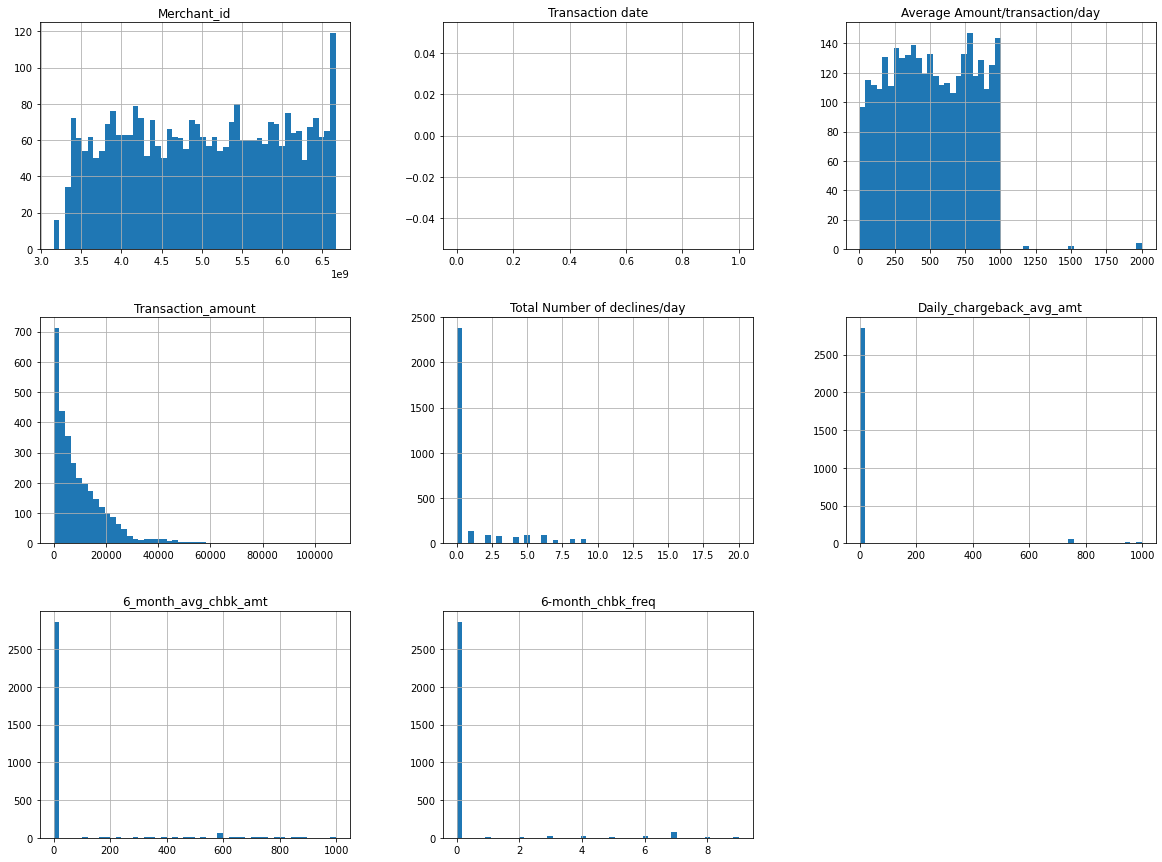

In [28]:
#Visualización de Histograma para las variables numericas
df.hist(bins=50, figsize=(20,15))
plt.show()

In [29]:
#Visualización de datos nulos
df.isnull().sum()

Merchant_id                          0
Transaction date                  3075
Average Amount/transaction/day       0
Transaction_amount                   0
Is declined                          0
Total Number of declines/day         0
isForeignTransaction                 0
isHighRiskCountry                    0
Daily_chargeback_avg_amt             0
6_month_avg_chbk_amt                 0
6-month_chbk_freq                    0
isFradulent                          0
dtype: int64

In [30]:
#Eliminación de la variable Transaction Date
df.drop(["Transaction date"],axis=1, inplace=True)
df.isnull().sum()

Merchant_id                       0
Average Amount/transaction/day    0
Transaction_amount                0
Is declined                       0
Total Number of declines/day      0
isForeignTransaction              0
isHighRiskCountry                 0
Daily_chargeback_avg_amt          0
6_month_avg_chbk_amt              0
6-month_chbk_freq                 0
isFradulent                       0
dtype: int64

In [31]:
# Metodo para cambiar las variables categoricas a numericas
dsEtiquetas=df.select_dtypes(include=['object'])
le=LabelEncoder()
for c in dsEtiquetas.columns:    
    le.fit(df[c].values)
    df[c] = le.transform(df[c].values)

In [32]:
df

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,3160040998,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,3160041896,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,3160141996,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,3160241992,500.0,26000.0,0,0,1,1,800,677.2,6,1
...,...,...,...,...,...,...,...,...,...,...,...
3070,6661273532,500.0,11000.0,1,0,0,0,754,585.0,7,0
3071,6661273532,800.0,0.0,1,0,0,0,754,585.0,7,0
3072,6661273533,800.0,20800.0,1,0,0,0,754,585.0,7,0
3073,6661273532,1500.0,12000.0,1,0,1,1,754,585.0,7,0


<AxesSubplot:>

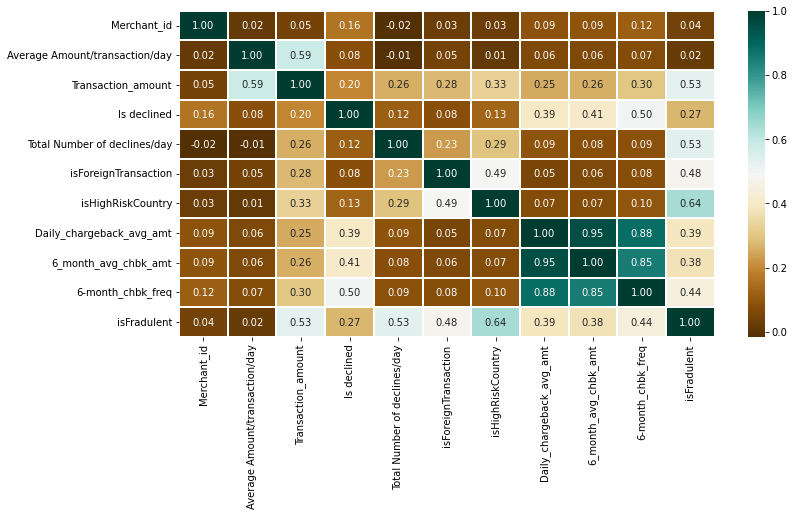

In [33]:
#matriz de correlación de los datos seleccionados
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [34]:
#Scalamiento de los datos
scalar = StandardScaler()
dataScalar = pd.DataFrame(scalar.fit_transform(df),
                         columns = df.columns)

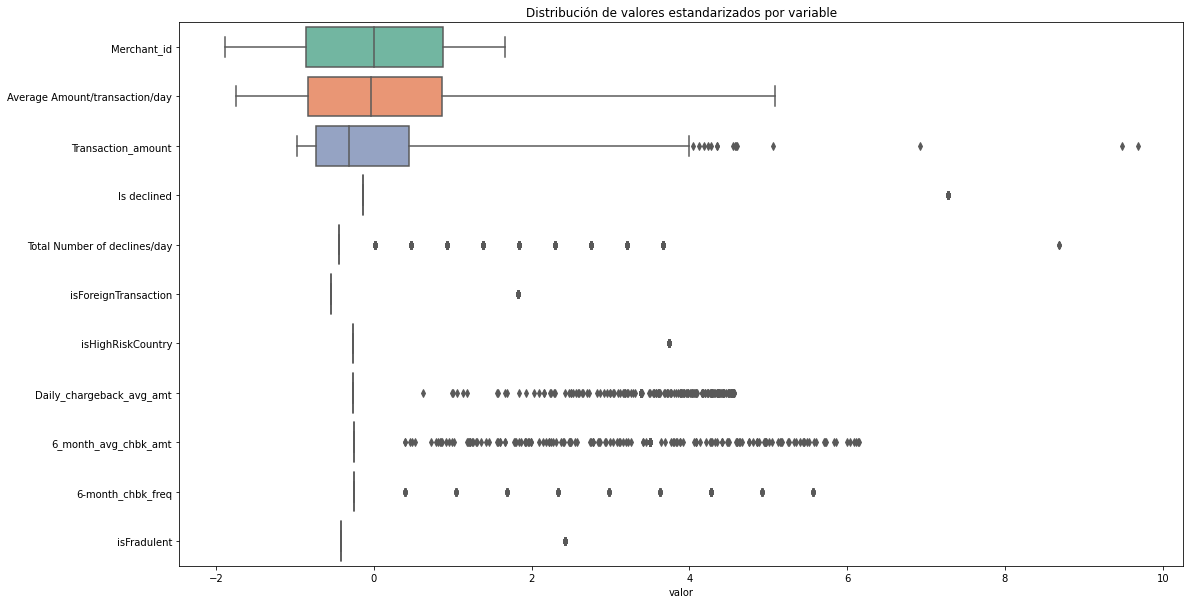

In [35]:
#Diagrama de caja y bigote
data_boxplot = sns.boxplot(data=dataScalar,orient = 'h',palette = 'Set2',whis = 3)
plt.title('Distribución de valores estandarizados por variable')
plt.xlabel('valor')
data_boxplot.figure.set_size_inches(18,10)

<H3>Algoritmo K-Means</H3>

In [36]:
#Selección de datos al azar 
#para posteriormente verificar al cruster al que pertenecen
data = dataScalar.copy()
indices = [340, 2905,1060]
muestras = pd.DataFrame(data.loc[indices],columns=data.keys()).reset_index(drop=True)

In [37]:
#Eliminamos las 3 filas del conjunto de datos
X = data.drop(indices,axis=0)

**Aplicación del metodo del codo**

Se aplica el metodo del codo para encontrar el valor optimo de K

In [40]:
#Instalar yellowbrick para visualizar la curva del codo
!pip install yellowbrick  

In [44]:
from yellowbrick.cluster import KElbowVisualizer

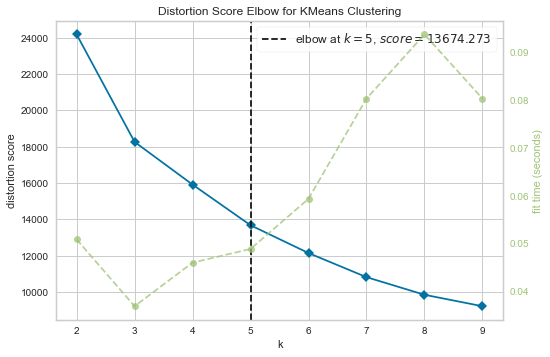

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
# Instanciar el modelo de clustering y el visualizador
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(X)        # Ajustar los datos al visualizador
visualizer.show()        # Finalizar y mostrar la figura

Como se observa, el valor optimo de K a tomar para este set de datos, es el 5, no obtante se puede probar con valores de 4 y 6 para ver resultados.

Se aplica el algoritmo de clustering, junto con el valor de K definido en la grafica.

In [46]:
algoritmo = KMeans(n_clusters = 5,init = 'k-means++', max_iter = 300,n_init = 10)

In [47]:
#se entrena al algoritmo
algoritmo.fit(X)

#se obtienen los datos de los centroides y las etiquetas
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

Se utilizan las muestras obtenidas anteriormente y se verifica en que cluster se encuentra

In [48]:
muestra_pred = algoritmo.predict(muestras)

Finalmente, se grafican los resultados.

C:\Users\jcarl\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


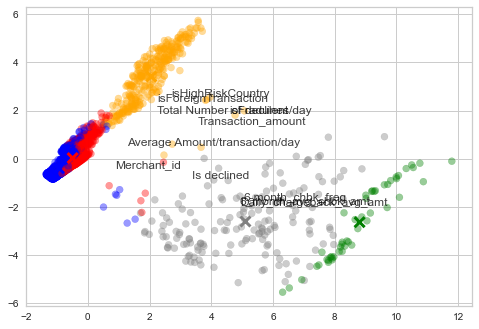

In [52]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA

modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 

#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray']

#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)

#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)

#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns

#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    #plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
             # width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)

plt.show()

Al analizar el resultado final de clasificación, se pueden observar los 5 clusters definidos por una X en su respectivo color (azul,rojo, verde,naranja y gris).

Se observan valores atipicos que no estan correctamente categorizados, como lo son el azul amarillo, etc.

<H3>Tecnica de IsoletionForest para detección de anomalias</H3>

In [54]:
from sklearn.ensemble import IsolationForest

data2 = dataScalar.copy()
modelo_isof = IsolationForest(n_estimators = 100, max_samples = 'auto', n_jobs = -1, contamination = float(0.01), max_features = 1.0)
modelo_isof.fit(data2)

C:\Users\jcarl\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, n_jobs=-1)

In [56]:
clf_anomalia = modelo_isof.predict(data2)
clf_anomalia

array([ 1,  1,  1, ...,  1, -1, -1])

In [58]:
score_anomalia = modelo_isof.score_samples(data2)
score_anomalia

array([-0.62374294, -0.62289948, -0.65662121, ..., -0.67998309,
       -0.72859126, -0.73951738])

C:\Users\jcarl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\jcarl\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Score de anomalías')

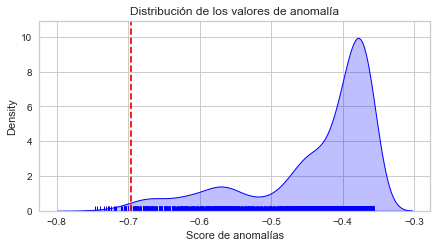

In [59]:
cuantil_01 = np.quantile(score_anomalia, q=0.01)
# Graficamos la distribución
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(7, 3.5))
sns.distplot(score_anomalia, hist=False, rug=True, color='blue', kde_kws={'shade':True, 'linewidth':1}, ax=ax)

ax.axvline(cuantil_01, c='red', linestyle='--', label='cuantil 0.01')
ax.set_title('Distribución de los valores de anomalía')
ax.set_xlabel('Score de anomalías')

In [65]:
# DATOS

# Selección de las variables que se utilizarán para la detección de anomalías
X = data2[['isFradulent', 'Total Number of declines/day', 'Daily_chargeback_avg_amt', '6-month_chbk_freq', 'Average Amount/transaction/day', 'Transaction_amount', '6_month_avg_chbk_amt']]

# Entrenar el modelo Isolation Forest
model = IsolationForest(n_estimators=1500, contamination=0.15, random_state=60)
model.fit(X)

# Predecir las anomalías en los datos
anomaly_scores = model.decision_function(X)
is_anomaly = model.predict(X)

# Mostrar los resultados de la detección de anomalías
anomaly_results = pd.DataFrame({'anomaly_score': anomaly_scores, 'is_anomaly': is_anomaly})
print(anomaly_results)

C:\Users\jcarl\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


      anomaly_score  is_anomaly
0         -0.024512          -1
1         -0.022401          -1
2         -0.012433          -1
3         -0.033696          -1
4         -0.093389          -1
...             ...         ...
3070      -0.099072          -1
3071      -0.121018          -1
3072      -0.105868          -1
3073      -0.132759          -1
3074      -0.146824          -1

[3075 rows x 2 columns]


In [136]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

train, test = train_test_split(df, test_size = 0.3)

In [137]:
X_train = train[[
         'Total Number of declines/day', 
         'Daily_chargeback_avg_amt', 
         '6-month_chbk_freq', 
         'Average Amount/transaction/day', 
         'Transaction_amount', 
         '6_month_avg_chbk_amt']]
y_train = train[['isFradulent']]

In [149]:
X_test =test[[
         'Total Number of declines/day', 
         'Daily_chargeback_avg_amt', 
         '6-month_chbk_freq', 
         'Average Amount/transaction/day', 
         'Transaction_amount', 
         '6_month_avg_chbk_amt']]
y_test = test[['isFradulent']]

In [139]:
modelo_isol = IsolationForest(
                n_estimators = 1500,
                max_samples = 'auto',
                contamination = 0.15,
                n_jobs = -1,
                random_state=60
)

modelo_isol.fit(X = X_train)

C:\Users\jcarl\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.15, n_estimators=1500, n_jobs=-1,
                random_state=60)

In [140]:
y_pred = modelo_isol.predict(X=X_train)
df_predict = pd.DataFrame(y_pred,columns=['isFradulent_predict'])

df_train = X_train.reset_index(drop=True)
df_train['isFradulent'] = y_train['isFradulent'].reset_index(drop=True)
df_train['isFradulent_predict'] = df_predict['isFradulent_predict'].reset_index(drop=True)

In [146]:
print('Total de datos fraudulentos para el set de train',df_train[df_train['isFradulent']==1].shape)
print('Total de datos no fraudulentos para el set de train',df_train[df_train['isFradulent']==0].shape)   

Total de datos fraudulentos para el set de train (313, 8)
Total de datos no fraudulentos para el set de train (1839, 8)


In [150]:
y_pred2 = modelo_isol.predict(X_test)
df_predict = pd.DataFrame(y_pred2,columns=['isFradulent_predict'])

df_test=X_test.reset_index(drop=True)

df_test['isFradulent'] = y_test['isFradulent'].reset_index(drop=True)
df_test['isFradulent_predict'] = df_predict['isFradulent_predict'].reset_index(drop=True)

In [151]:
df_train['isFradulent_predict'] = df_train['isFradulent_predict'].replace(1,0)
df_train['isFradulent_predict'] = df_train['isFradulent_predict'].replace(-1,1)

df_test['isFradulent_predict'] = df_test['isFradulent_predict'].replace(1,0)
df_test['isFradulent_predict'] = df_test['isFradulent_predict'].replace(-1,1)

In [154]:
print(f'puntuación del modelo en los datos de entrenamiento: {modelo_isol.score(X_train, y_train)}')
print(f'puntuación del modelo en los datos de testing: {modelo_isol.score(X_test, y_test)}')

AttributeError: 'IsolationForest' object has no attribute 'score'